# Using pytorch to do MINST once using NN and once using CNN

In [1]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [2]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

mps


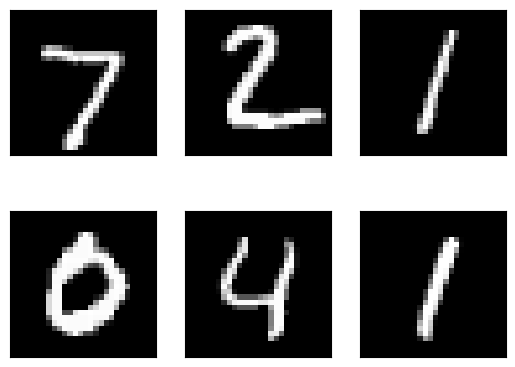

In [3]:
# Device configuration (MPS FOR MACBOOK)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(device)

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor(),
                                          download=True)

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.xticks([])  # Remove x-axis tick labels
    plt.yticks([])  # Remove y-axis tick labels
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [4]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = nn.functional.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [100/600], Loss: 0.2684
Epoch [1/10], Step [200/600], Loss: 0.3314
Epoch [1/10], Step [300/600], Loss: 0.3167
Epoch [1/10], Step [400/600], Loss: 0.1644
Epoch [1/10], Step [500/600], Loss: 0.1594
Epoch [1/10], Step [600/600], Loss: 0.0962
Epoch [2/10], Step [100/600], Loss: 0.0818
Epoch [2/10], Step [200/600], Loss: 0.1071
Epoch [2/10], Step [300/600], Loss: 0.0362
Epoch [2/10], Step [400/600], Loss: 0.0684
Epoch [2/10], Step [500/600], Loss: 0.1288
Epoch [2/10], Step [600/600], Loss: 0.1135
Epoch [3/10], Step [100/600], Loss: 0.0490
Epoch [3/10], Step [200/600], Loss: 0.0835
Epoch [3/10], Step [300/600], Loss: 0.0486
Epoch [3/10], Step [400/600], Loss: 0.0835
Epoch [3/10], Step [500/600], Loss: 0.0363
Epoch [3/10], Step [600/600], Loss: 0.0804
Epoch [4/10], Step [100/600], Loss: 0.0274
Epoch [4/10], Step [200/600], Loss: 0.0361
Epoch [4/10], Step [300/600], Loss: 0.0104
Epoch [4/10], Step [400/600], Loss: 0.0672
Epoch [4/10], Step [500/600], Loss: 0.0737
Epoch [4/10

In [5]:
with torch.no_grad():
    n_correct = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)

        _, predicted = torch.max(outputs, 1)
        n_correct += (predicted == labels).sum().item()

    acc = n_correct / n_samples
    print(f'Accuracy of the network on the {n_samples} test images: {100*acc} %')

Accuracy of the network on the 10000 test images: 98.03 %


Files already downloaded and verified
Files already downloaded and verified


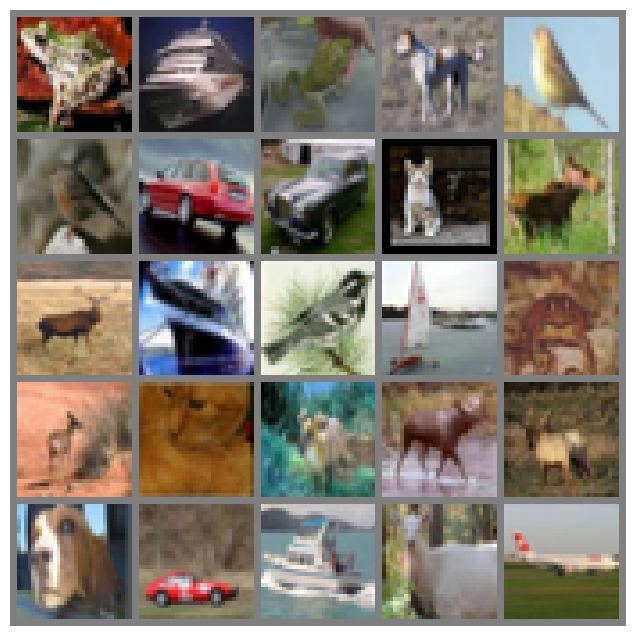

In [6]:
num_epochs = 10
batch_size = 32
learning_rate = 0.001

# dataset has PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(imgs):
    imgs = imgs / 2 + 0.5
    npimgs = imgs.numpy()
    plt.figure(figsize=(8, 8))
    plt.imshow(np.transpose(npimgs, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# one batch of random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
img_grid = torchvision.utils.make_grid(images[0:25], nrow=5)
imshow(img_grid)

In [7]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()

        # First convolutional block
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)

        # Second convolutional block
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout2d(0.25)

        # Third convolutional block
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        # Fourth convolutional block
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.dropout2 = nn.Dropout2d(0.25)

        # Fifth convolutional block
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(256)

        # Sixth convolutional block
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(256)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.dropout3 = nn.Dropout2d(0.25)

        # Fully connected layers
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.bn_fc1 = nn.BatchNorm1d(512)
        self.dropout4 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 128)
        self.bn_fc2 = nn.BatchNorm1d(128)
        self.dropout5 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, num_classes)

    def forward(self, x):
        # Input: N, 3, 32, 32
        x = nn.functional.relu(self.bn1(self.conv1(x)))     # N, 64, 32, 32
        x = nn.functional.relu(self.bn2(self.conv2(x)))     # N, 64, 32, 32
        x = self.pool1(x)                                   # N, 64, 16, 16
        x = self.dropout1(x)
        x = nn.functional.relu(self.bn3(self.conv3(x)))     # N, 128, 16, 16
        x = nn.functional.relu(self.bn4(self.conv4(x)))     # N, 128, 16, 16
        x = self.pool2(x)                                   # N, 128, 8, 8
        x = self.dropout2(x)
        x = nn.functional.relu(self.bn5(self.conv5(x)))     # N, 256, 8, 8
        x = nn.functional.relu(self.bn6(self.conv6(x)))     # N, 256, 8, 8
        x = self.pool3(x)                                   # N, 256, 4, 4
        x = self.dropout3(x)
        x = x.view(-1, 256 * 4 * 4)                         # N, 4096
        x = nn.functional.relu(self.bn_fc1(self.fc1(x)))    # N, 512
        x = self.dropout4(x)
        x = nn.functional.relu(self.bn_fc2(self.fc2(x)))    # N, 128
        x = self.dropout5(x)
        x = self.fc3(x)                                     # N, 10
        return x

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):

    running_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        running_loss += loss.item()

    print(f'[{epoch + 1}] loss: {running_loss / n_total_steps:.3f}')

[1] loss: 1.490
[2] loss: 1.103
[3] loss: 0.944
[4] loss: 0.835
[5] loss: 0.752
[6] loss: 0.684
[7] loss: 0.619
[8] loss: 0.564
[9] loss: 0.527
[10] loss: 0.488


In [ ]:
with torch.no_grad():
    n_correct = 0
    n_correct2 = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, predicted = torch.max(outputs, 1)
        n_correct += (predicted == labels).sum().item()

        outputs2 = model(images)
        _, predicted2 = torch.max(outputs2, 1)
        n_correct2 += (predicted2 == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the model: {acc} %')

    acc = 100.0 * n_correct2 / n_samples
    print(f'Accuracy of the loaded model: {acc} %')

Accuracy of the model: 78.75 %
Accuracy of the loaded model: 78.49 %
